## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
churn_data = pd.read_csv('../data/churn.csv')

In [3]:
churn_data.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

## Checking Basic Info

In [4]:
# shape of the dataset

print(churn_data.shape)

(7043, 21)


In [5]:
# list of columns
print(churn_data.columns.to_list())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
# check data types and null values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The 'TotalCharges'  column above is object type, when it's supposed to be an integer/float. We can convert that column into numeric as shown below. 

In [7]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

After conversion, we can check if there are any null/missing values in the column. 

In [8]:
churn_data['TotalCharges'].isnull().sum()


11

In [9]:
# check for missing values

churn_data.isnull().sum()

#.sum() counts the number of missing values per column 
# using only .isnull() gives a dataframe with True missing values. 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## The Target Variable - "churn" 

In [10]:
vc = churn_data['Churn'].value_counts() #counts how many customers churned (yes) and stayed(no)
print(vc)
n_vc = churn_data['Churn'].value_counts(normalize=True) #converts the counts into percentages and helps us see 
                                                                                            #class imbalance
print(n_vc)

No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


## Visualise the Class Distribution

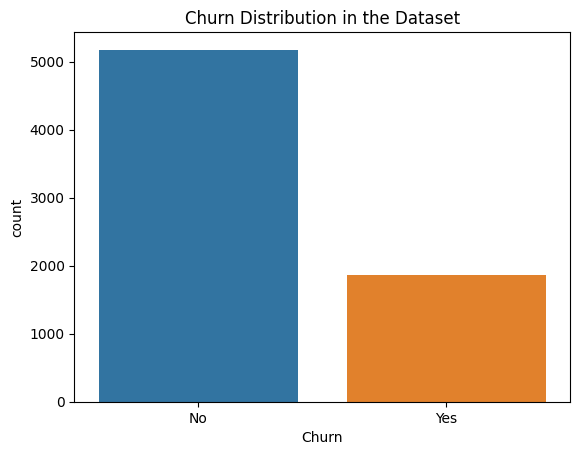

In [11]:
# We can visualise the class distribution in the target variable to check for imbalance

sns.countplot(x='Churn', data=churn_data)
plt.title('Churn Distribution in the Dataset')
plt.show()

##### NOTE!
From the above visualisation, it is clear there is a class imabalance and the dataset is imbalanced. In such cases, especially in classification problems,  the model will always use the majority class to predict which is not a good sign. We can tackle this imbalance moving forward, at the modeling stage of our project by using 'Class Weights' or using better metrics to evaluate the model. 

## Exploring Numerical Features

This step will help us detect outliers. It also helps us understand the spread and distribution of each variable.

In [12]:
churn_data.describe() #it shows mean, std, min, max and count for the numeric columns in the dataset. 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


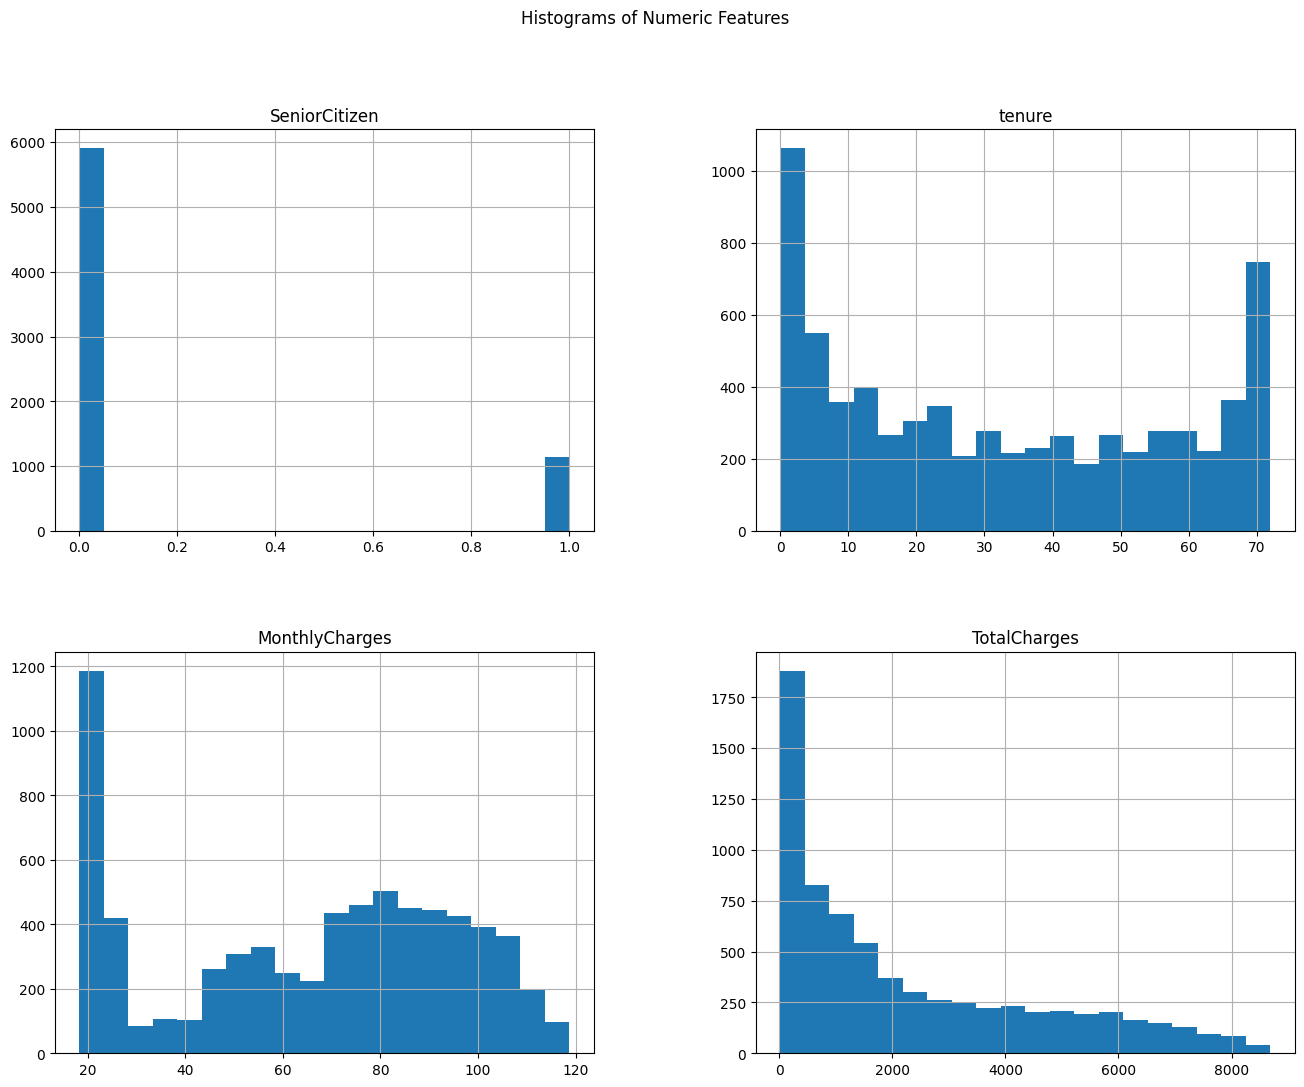

In [13]:
# Plot histograms for numeric features
churn_data.hist(bins=20, figsize=(16, 12))
plt.suptitle("Histograms of Numeric Features")
plt.show()


The above histograms for the numeric features in the dataset are essential for our understanding of the project and how they are going to impact the next steps in the project.

##### Histogram - SeniorCitizen

This is a binary numeric feature(0 or 1), telling us if a particular customer is senior citizen or not. Clearly, most of the customers are not senior citizens. 

##### Histogram - Tenure
Tenure means the number of months a customer has stayed. From the graph, we can see that there are many customers with tenure 0, this means that they are new customers. The bar at 70 suggests that they are long-term customers. 

##### Histogram - MonthlyCharges 
Monthly charges has skewed distribution, where there's a spike at around $20-$30 and a fewer customers above $100.

##### Histogram - TotalCharges
It is a right-skewed histogram, and most customers are clustered on the left-side paying under $2000. There are a very few customers that are paying more than $8000. 

## Dropping Irrelevant Columns


In [14]:
# Drop customerID (not useful for training a model)
churn_data.drop('customerID', axis=1, inplace=True)


In the above code, we dropped 'customerID' because it a unique identifier and doesn't really help with churn prediction. 

## Exploring Categorical Features

After dropping the CustomerID column, we are going to create a list of the rest of categorical features in the dataset. This list can be used to encode them moving forward. 

In [15]:
cat_cols = churn_data.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


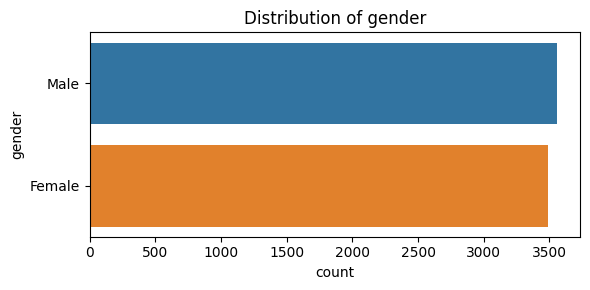

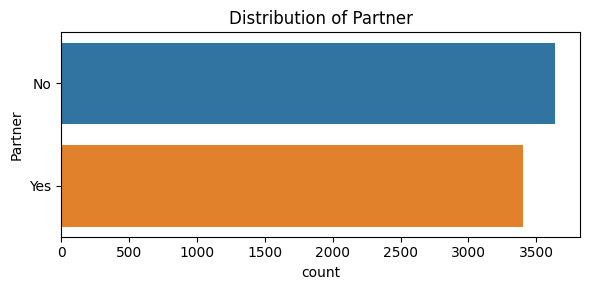

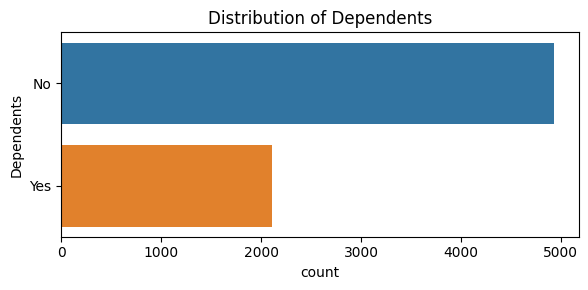

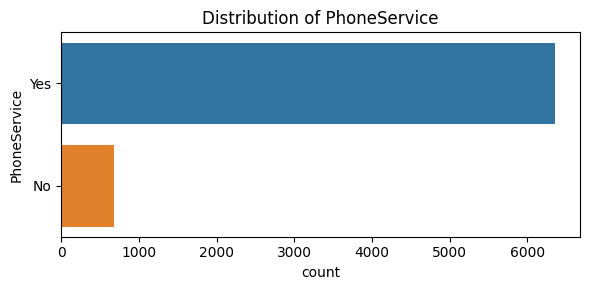

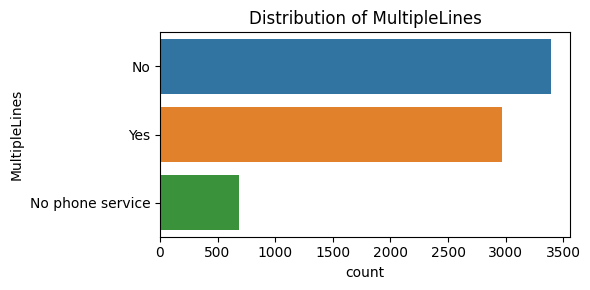

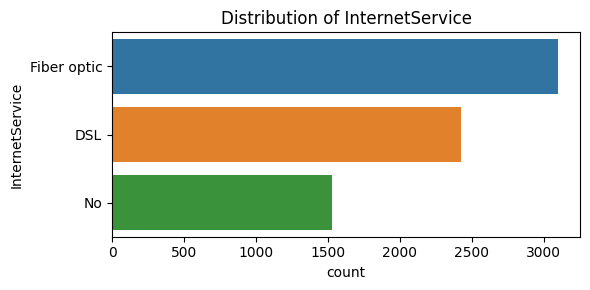

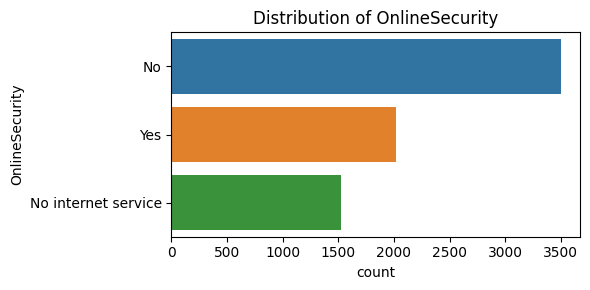

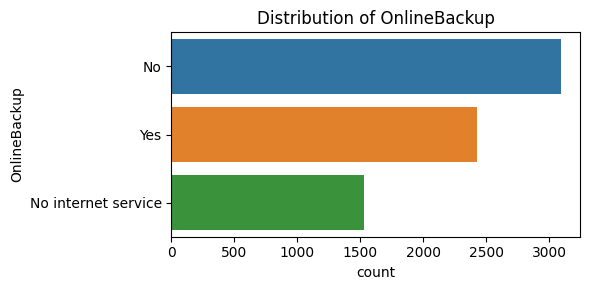

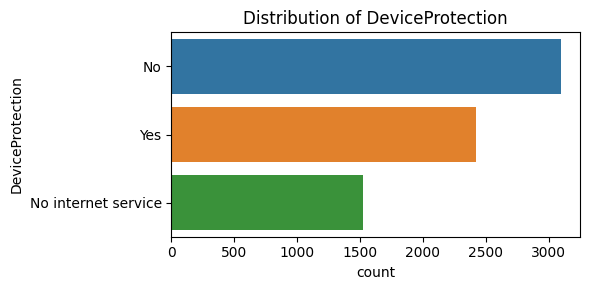

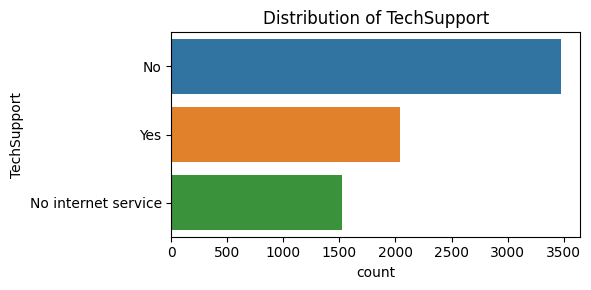

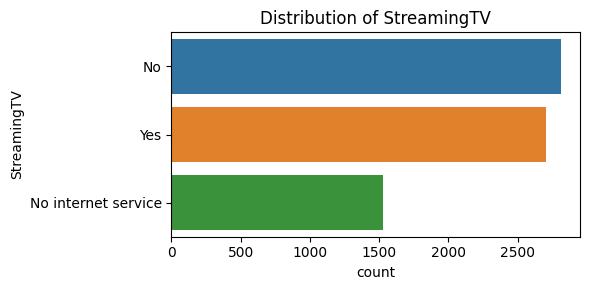

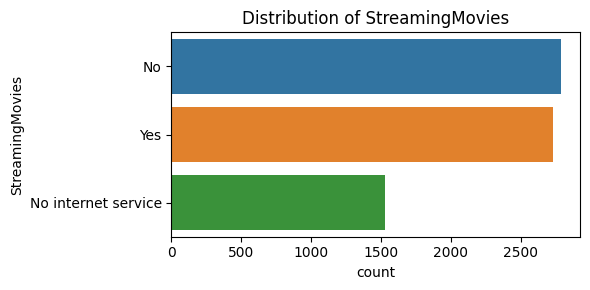

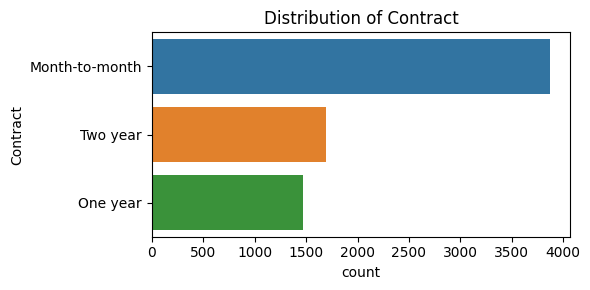

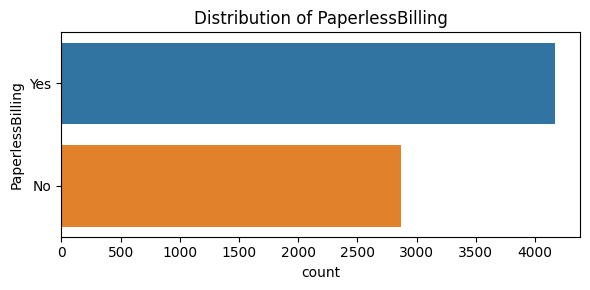

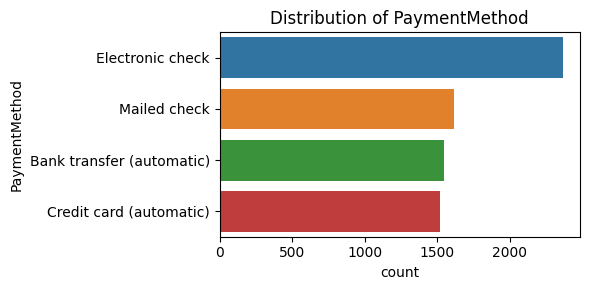

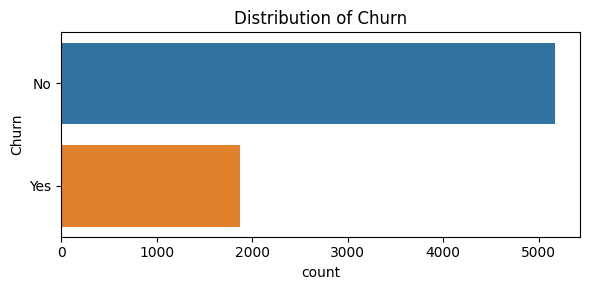

In [16]:
# Plot bar charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=churn_data, order=churn_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


## Correlation Heatmap

In [17]:
# Convert target to numeric for correlation
churn_data['Churn_Encoded'] = churn_data['Churn'].map({'No': 0, 'Yes': 1})


since correlation only works with numeric values, we converted the target variable into numeric values (0(no) or 1(yes)). We can now plot a heatmap to check the correlation among the variables. 

In [25]:
num_cols = churn_data.select_dtypes(include=['int64', 'float64'])

# Now compute correlation matrix
corr = num_cols.corr()

In the above code snippet, I extracted only the numeric columns to build the correlation matrix/heatmap.

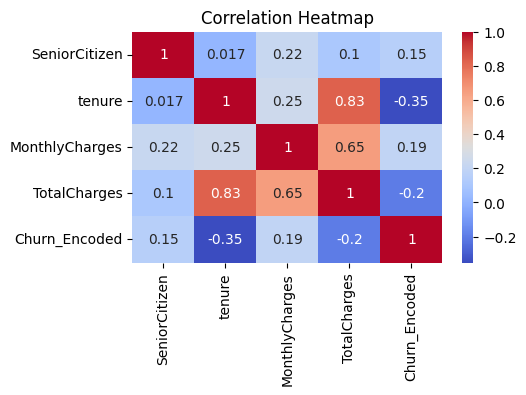

In [24]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From the above correlation heatmap, we can see that -
a. tenure and TotalCharges have a strong positive correlation. If tenure increases, then the total charges also increase. 
b. tenure and churn_encoded have a negative correlation. If tenure is more, then that person is more likely to churn.

###  Correlation values and their meaning(general) -

| value | Meaning |
-------|-----------
| +1.0 | Perfect Positive Correlation |
| 0.5 to 0.9 | Strong Positive relationship |
| 0.1 to 0,4 | Weak Positive relationship |
| 0 | No correlation |
| -0.1 to -0.4 | Weak Negative relationship |
| -0.5 to -0.9 | Strong Negative relationship |
| -1.0 | Perfect Negative correlation |